# Quadratic Dataset

Stats of the quadratic dataset and getting a balanced dataset from these samples.

The formula to generate the dataset:
<br>
w_11*(Age** 3) + w_21 *Age* (Dependents** 2) + w_22 *Age* Annual_Income + w_31*(Monthly_loans** 2) + w_32*(Income_stability** 3) + w_41* Dependents* Portfolio_status  + w_51*(Investment_obj** 2)* Monthly_loans + w_52* Duration_inv* Dependents + w_61* Monthly_loans* Comfort + w_62* Behaviour* Dependents

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

The entire dataset combined below:

In [2]:
df_1 = pd.read_csv("Quadratic_data_total/x_11_1_quadratic.csv")
df_05 = pd.read_csv("Quadratic_data_total/x_11_05_quadratic.csv")
df_02 = pd.read_csv("Quadratic_data_total/x_11_02_quadratic.csv")

In [3]:
quadratic_df =pd.concat([df_1,df_05,df_02])
quadratic_df = quadratic_df[['Age','Dependents','Annual_income','Monthly_loans','Income_stability','Portfolio_status','Investment_obj','Duration_inv','Comfort','Behaviour','output']]

Column types and data count. 

In [4]:
quadratic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750000 entries, 0 to 1249999
Data columns (total 11 columns):
Age                 float64
Dependents          float64
Annual_income       float64
Monthly_loans       float64
Income_stability    float64
Portfolio_status    float64
Investment_obj      float64
Duration_inv        float64
Comfort             float64
Behaviour           float64
output              float64
dtypes: float64(11)
memory usage: 343.3 MB


Columns, their unique elements and number of unique elements.

In [5]:
for col in quadratic_df:
    print(col,":Unique Elements: ",quadratic_df[col].unique(),",Number of unique elements: ",len(quadratic_df[col].unique()))

Age :Unique Elements:  [1.  0.5 0.2] ,Number of unique elements:  3
Dependents :Unique Elements:  [1.  0.8 0.6 0.1] ,Number of unique elements:  4
Annual_income :Unique Elements:  [0.2 0.4 0.6 0.8 1. ] ,Number of unique elements:  5
Monthly_loans :Unique Elements:  [1.  0.8 0.6 0.4 0.2] ,Number of unique elements:  5
Income_stability :Unique Elements:  [0.1 0.3 0.6 1. ] ,Number of unique elements:  4
Portfolio_status :Unique Elements:  [0.4 0.6 0.5 0.8] ,Number of unique elements:  4
Investment_obj :Unique Elements:  [0.65 0.6  0.4  0.5  1.  ] ,Number of unique elements:  5
Duration_inv :Unique Elements:  [0.5  0.8  0.65 0.6  0.7 ] ,Number of unique elements:  5
Comfort :Unique Elements:  [1.  0.9 0.5 0.2 0.1] ,Number of unique elements:  5
Behaviour :Unique Elements:  [0.2 0.3 0.5 0.9 1. ] ,Number of unique elements:  5
output :Unique Elements:  [4.41465 4.47965 4.60965 ... 1.17066 1.13316 1.17866] ,Number of unique elements:  356089


In [6]:
quadratic_df.apply(lambda x: len(x.unique()))

Age                      3
Dependents               4
Annual_income            5
Monthly_loans            5
Income_stability         4
Portfolio_status         4
Investment_obj           5
Duration_inv             5
Comfort                  5
Behaviour                5
output              356089
dtype: int64

Correlations in the dataset.

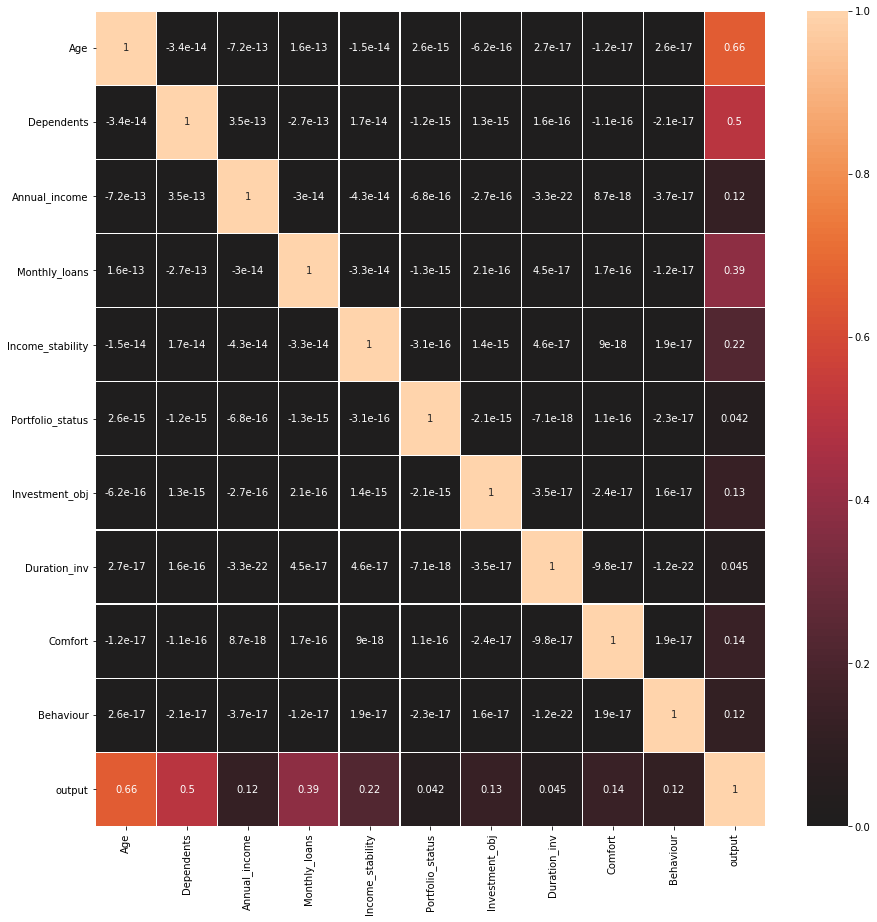

In [7]:
correlation_matrix = quadratic_df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix, center=0, annot=True, linewidths=.3)

In [8]:
correlation_matrix

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output
Age,1.000000e+00,-3.377068e-14,-7.191090e-13,1.631766e-13,-1.524255e-14,2.555101e-15,-6.228774e-16,2.691615e-17,-1.242327e-17,2.638831e-17,0.658420
Dependents,-3.377068e-14,1.000000e+00,3.514393e-13,-2.681363e-13,1.742707e-14,-1.195217e-15,1.271962e-15,1.609923e-16,-1.057057e-16,-2.115260e-17,0.503121
Annual_income,-7.191090e-13,3.514393e-13,1.000000e+00,-2.988641e-14,-4.334088e-14,-6.767617e-16,-2.660533e-16,-3.271026e-22,8.688981e-18,-3.693970e-17,0.120264
Monthly_loans,1.631766e-13,-2.681363e-13,-2.988641e-14,1.000000e+00,-3.284594e-14,-1.326681e-15,2.069151e-16,4.464898e-17,1.739189e-16,-1.231455e-17,0.385800
Income_stability,-1.524255e-14,1.742707e-14,-4.334088e-14,-3.284594e-14,1.000000e+00,-3.136042e-16,1.364246e-15,4.609630e-17,8.993492e-18,1.930942e-17,0.223446
Portfolio_status,2.555101e-15,-1.195217e-15,-6.767617e-16,-1.326681e-15,-3.136042e-16,1.000000e+00,-2.085583e-15,-7.119477e-18,1.064907e-16,-2.327230e-17,0.042282
Investment_obj,-6.228774e-16,1.271962e-15,-2.660533e-16,2.069151e-16,1.364246e-15,-2.085583e-15,1.000000e+00,-3.483931e-17,-2.411819e-17,1.639400e-17,0.126951
Duration_inv,2.691615e-17,1.609923e-16,-3.271026e-22,4.464898e-17,4.609630e-17,-7.119477e-18,-3.483931e-17,1.000000e+00,-9.838346e-17,-1.161026e-22,0.045202
Comfort,-1.242327e-17,-1.057057e-16,8.688981e-18,1.739189e-16,8.993492e-18,1.064907e-16,-2.411819e-17,-9.838346e-17,1.000000e+00,1.929099e-17,0.137112
Behaviour,2.638831e-17,-2.115260e-17,-3.693970e-17,-1.231455e-17,1.930942e-17,-2.327230e-17,1.639400e-17,-1.161026e-22,1.929099e-17,1.000000e+00,0.117065


Correlations with just the outcome column.

In [9]:
df_correlations = quadratic_df.corr()
df_correlations['output'].sort_values(ascending=False)

output              1.000000
Age                 0.658420
Dependents          0.503121
Monthly_loans       0.385800
Income_stability    0.223446
Comfort             0.137112
Investment_obj      0.126951
Annual_income       0.120264
Behaviour           0.117065
Duration_inv        0.045202
Portfolio_status    0.042282
Name: output, dtype: float64

##### Minimum and maximum values of the dataset.

The higher the value of the outcome implies higher risk taking behaviour of the user.

In [10]:
print( quadratic_df.output.min(), quadratic_df.output.max())

0.18211000000000005 7.150000000000001


##### Probability density of all the values in the quadratic equation

Text(0, 0.5, 'Probability Density')

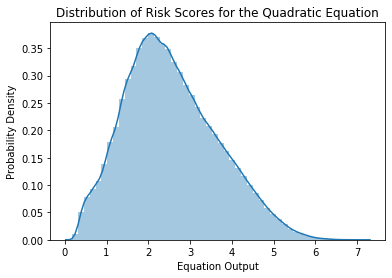

In [11]:
sns.distplot(quadratic_df.output,label="Distribution of Risk Scores")
plt.title("Distribution of Risk Scores for the Quadratic Equation")
plt.xlabel("Equation Output")
plt.ylabel("Probability Density")

### Categories of users.
<br>
Users calculated risk is a continuous values difficult to assess. The outcome is divided into five categories as follows:
<br>
No Risk : Below 1.5
<br>
Low Risk : 1.5 to 2.3
<br>
Moderate Risk : 2.3 to 3.3
<br>
Likes Risk : 3.3 to 4.3
<br>
High Risk : Above 4.3

In [12]:
df=quadratic_df
#Creating a new column with same values as output
df = df.assign(categories = df['output'])
df.loc[df['output'] <= 1.5, 'categories'] = 1
df.loc[(df['output'] > 1.5) & (df['output'] <= 2.3) , 'categories'] = 2
df.loc[(df['output'] > 2.3) & (df['output'] <= 3.3) , 'categories'] = 3
df.loc[(df['output'] > 3.3) & (df['output'] <= 4.3) , 'categories'] = 4
df.loc[df['output']>4.3, 'categories'] = 5

### New category distribution

The categories in the dataset are imbalanced, this could skew further analysis as our dataset is very large with the highly populated categories overshadowing the others.

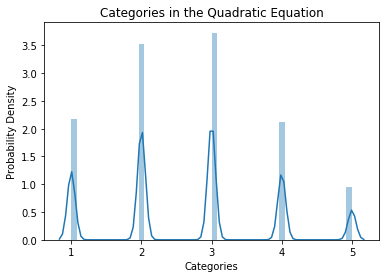

In [13]:
sns.distplot(df.categories)
plt.title("Categories in the Quadratic Equation")
plt.xlabel("Categories")
plt.ylabel("Probability Density")
plt.show()

Category 3 and 2 are highly populated

In [14]:
df.categories.value_counts()

3.0    1118259
2.0    1055754
1.0     653408
4.0     637694
5.0     284885
Name: categories, dtype: int64

##### Getting a proportional balanced dataset of 30% of the samples.

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=3,test_size=0.3,random_state=42)
# n_splits= number of shuffles and iterations

#loop to stratify by category and store in train and test set
for train_index,test_index in split.split(df,df['categories']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [16]:
strat_test_set.head()

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output,categories
315697,1.0,0.8,0.2,1.0,0.3,0.4,0.65,0.65,0.1,0.5,3.60875,4.0
271397,1.0,1.0,1.0,0.8,0.6,0.8,0.60,0.50,0.1,0.5,4.62780,5.0
386320,0.5,0.8,0.4,1.0,1.0,0.4,0.65,0.65,0.1,0.2,2.94460,3.0
841891,1.0,0.6,0.8,0.6,0.3,0.5,0.65,0.50,0.2,0.3,3.00815,3.0
1106871,0.5,0.1,0.6,0.4,0.6,0.4,1.00,0.70,0.1,0.3,1.06605,1.0


### Finding if the smaller division resembles the larger

If the two are similar, especially thow they vary with the outcome they can be considered a small representation of the dataset.

##### Large dataset

In [17]:
strat_train_set.shape

(2625000, 12)

In [18]:
strat_train_set.var()

Age                 0.108859
Dependents          0.111877
Annual_income       0.079969
Monthly_loans       0.080008
Income_stability    0.114979
Portfolio_status    0.022400
Investment_obj      0.041594
Duration_inv        0.010006
Comfort             0.130367
Behaviour           0.101647
output              1.223884
categories          1.357551
dtype: float64

##### Smaller sample

In [29]:
strat_test_set.shape

(1125000, 12)

In [30]:
strat_test_set.var()

Age                 0.108958
Dependents          0.111871
Annual_income       0.080071
Monthly_loans       0.079982
Income_stability    0.115049
Portfolio_status    0.022401
Investment_obj      0.041615
Duration_inv        0.009987
Comfort             0.130477
Behaviour           0.101489
output              1.222834
categories          1.357553
dtype: float64

In [20]:
print( strat_train_set.shape,strat_test_set.shape)

(2625000, 12) (1125000, 12)


#### Correlations in the smaller sample

In [21]:
strat_test = strat_test_set.corr()
strat_test['output'].sort_values(ascending=False)


output              1.000000
categories          0.963646
Age                 0.658209
Dependents          0.502360
Monthly_loans       0.386023
Income_stability    0.223437
Comfort             0.138112
Investment_obj      0.126666
Annual_income       0.120203
Behaviour           0.116967
Duration_inv        0.044932
Portfolio_status    0.041494
Name: output, dtype: float64

In [22]:
#correlation of other variables with target variable
strat_test['categories'].sort_values(ascending=False)

categories          1.000000
output              0.963646
Age                 0.640698
Dependents          0.485437
Monthly_loans       0.371431
Income_stability    0.213423
Comfort             0.131617
Investment_obj      0.118964
Behaviour           0.114555
Annual_income       0.109455
Duration_inv        0.043781
Portfolio_status    0.040315
Name: categories, dtype: float64

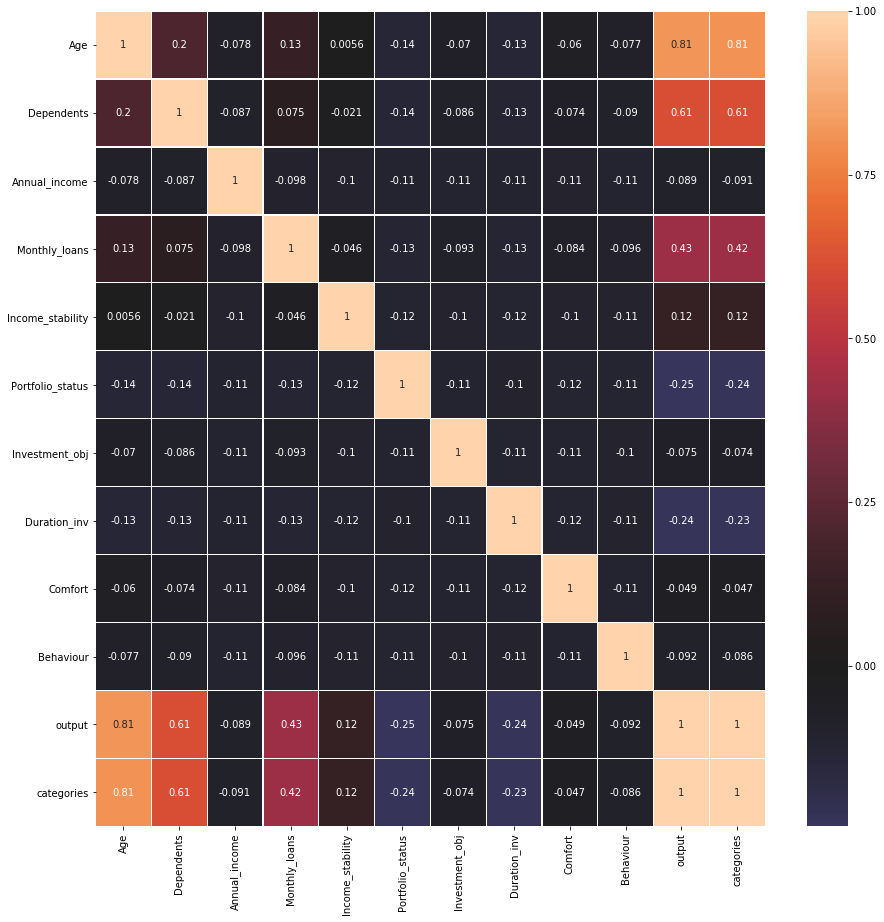

In [23]:
correlation_matrix_strat = strat_test.corr()   #creating a heatmap of the attributes in the dataset
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix_strat, center=0, annot=True, linewidths=.3)

#### Stratified Sample File

In [24]:
strat_test_set.to_csv("quadratic_stratified_sample_27nov2019.csv")

#### The values in the smaller set are more managable:

In [25]:
strat_test_set.categories.value_counts()

3.0    335478
2.0    316726
1.0    196022
4.0    191308
5.0     85466
Name: categories, dtype: int64

#### Final Category Values

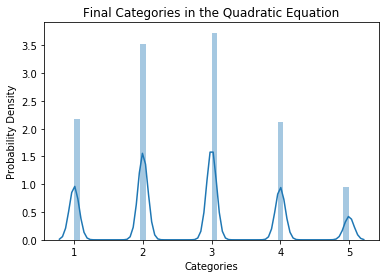

In [26]:
sns.distplot(strat_test_set.categories)
plt.title("Final Categories in the Quadratic Equation")
plt.xlabel("Categories")
plt.ylabel("Probability Density")
plt.show()